In [1]:
import utils.dataset as dataset
import utils.helpers as helpers
import implementations

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

In [2]:
TRAIN_DATASET = 'data/train.csv'
TEST_DATA = 'data/test.csv'

In [3]:
print("Loading data ..")

# load the train data
Y_train, X_train, indexes = dataset.load_csv_data(TRAIN_DATASET)

# {-1, 1} -> {0l, 1}
Y_train[np.where(Y_train==-1)] = 0.0

print("Load done ..")

Loading data ..
Load done ..


In [4]:
def add_bias_column(X):
    X_temp = np.ones((X.shape[0], X.shape[1]+1))
    X_temp[:,:-1] = X
    X = X_temp
    return X

In [5]:
print("Preprocessing train data ..")

ratio_for_splitting = 0.90

# chosen experimenttally
features_to_delete = [14, 17, 18]

# pre process train data
X_train = dataset.delete_features(X_train, features_to_delete)
X_train = dataset.preprocess_dataset(X_train, 10)

# adding bias to X_train data
X_train = add_bias_column(X_train)

# split_data
Y_train, Y_validation, X_train, X_validation = dataset.split_data(Y_train, X_train, ratio_for_splitting)
helpers.set_validation_dataset(X_validation, Y_validation)

print("Preprocess done ..")

Preprocessing train data ..
Preprocess done ..


In [6]:
print("Preprocessing test data ..")

# load test data for predicting Y_data
Y_test, X_test, indexes = dataset.load_csv_data(TEST_DATA)
Y_test[np.where(Y_test==-1)] = 0.0

# pre process test data
X_test = dataset.delete_features(X_test, features_to_delete)
X_test = dataset.preprocess_dataset(X_test, 10)

X_test = add_bias_column(X_test)

print("Preprocess done ..")

Preprocessing test data ..
Preprocess done ..


In [7]:
### delete

In [8]:
### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ###

In [9]:
### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ###

In [10]:
### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ###

In [11]:
# put function to helpers
def plot_train_test(train_errors, test_errors, test_range, title, testparam):
    """
    train_errors, test_errors and lambas should be list (of the same size) the respective train error and test error for a given lambda,
    * lambda[0] = 1
    * train_errors[0] = RMSE of a ridge regression on the train set
    * test_errors[0] = RMSE of the parameter found by ridge regression applied on the test set
    
    degree is just used for the title of the plot.
    """
    plt.semilogx(test_range, train_errors, color='b', marker='*', label="Train error")
    plt.semilogx(test_range, test_errors, color='r', marker='*', label="Test error")
    plt.xlabel(testparam)
    plt.ylabel("R_MSE")
    plt.title(title)
    leg = plt.legend(loc=1, shadow=True)
    leg.draw_frame(False)
    #plt.savefig("ridge_regression")

In [12]:
# defines initial w of size of features
_features = X_train.shape[1]
w_initial = np.zeros((_features), dtype=int)

In [31]:
def regression_gamma_testing(y, x, ratio, seed, test_range, method_name, params, to_test_param):
    # define parameter
    test_range = test_range
    
    # split data into test and train
    x_tr, x_te, y_tr, y_te = dataset.split_data(x, y, ratio, seed)
    c = 0
    
    # store train and test err
    err_train = []
    err_test = []
    
    training_gd_tr = implementations.Training(method_name, params)
    training_gd_te = implementations.Training(method_name, params)
    
    for ind, new_param in enumerate(test_range):
        training_gd_tr.params[to_test_param] = new_param
        print("GAMMA TRAIN", training_gd_tr.params[to_test_param])
        w_tr, mse_tr = training_gd_tr.fit(x_tr, y_tr)
        
        training_gd_te.params[to_test_param] = new_param  
        print("GAMMA test", training_gd_te.params[to_test_param])
        w_te, mse_te = training_gd_te.fit(x_te, y_te)
                
        err_train.append(mse_tr)
        err_test.append(mse_te)
        c += 1
        print(c, "proportion={p}, gamma={g:.3f}, Training RMSE={tr:.5f}, Testing RMSE={te:.5f}".format(
               p=ratio, g=new_param, tr=err_train[ind], te=err_test[ind]))
    plot_train_test(err_train, err_test, test_range, ""+method_name+" - "+to_test_param+" testing", to_test_param)


## Linear regression using gradient descent

GAMMA TRAIN 0.001
<><><><><><><><><><><><><><><><><><>
FITFITFITFITFIT
Gradient Descent(0/4): gamma=0.001 mse-loss=0.1716 
Gradient Descent(1/4): gamma=0.001 mse-loss=0.1710039783785887 
Gradient Descent(2/4): gamma=0.001 mse-loss=0.17042717584991235 
Gradient Descent(3/4): gamma=0.001 mse-loss=0.16986863902464347 
Gradient Descent(4/4): gamma=0.001 mse-loss=0.1693274655536263 
GAMMA test 0.001
<><><><><><><><><><><><><><><><><><>
FITFITFITFITFIT
Gradient Descent(0/4): gamma=0.001 mse-loss=0.17193333333333333 
Gradient Descent(1/4): gamma=0.001 mse-loss=0.17136961991792182 
Gradient Descent(2/4): gamma=0.001 mse-loss=0.17082245236190807 
Gradient Descent(3/4): gamma=0.001 mse-loss=0.1702910627366642 
Gradient Descent(4/4): gamma=0.001 mse-loss=0.16977472171271227 
1 proportion=0.9, gamma=0.001, Training RMSE=0.16933, Testing RMSE=0.16977
GAMMA TRAIN 0.0013894954943731374
<><><><><><><><><><><><><><><><><><>
FITFITFITFITFIT
Gradient Descent(0/4): gamma=0.0013894954943731374 mse-loss=0.1

Gradient Descent(4/4): gamma=0.013894954943731374 mse-loss=0.1527395980974325 
GAMMA test 0.013894954943731374
<><><><><><><><><><><><><><><><><><>
FITFITFITFITFIT
Gradient Descent(0/4): gamma=0.013894954943731374 mse-loss=0.17193333333333333 
Gradient Descent(1/4): gamma=0.013894954943731374 mse-loss=0.16485947087210975 
Gradient Descent(2/4): gamma=0.013894954943731374 mse-loss=0.16008097666191853 
Gradient Descent(3/4): gamma=0.013894954943731374 mse-loss=0.15640093605419395 
Gradient Descent(4/4): gamma=0.013894954943731374 mse-loss=0.1533068513650471 
9 proportion=0.9, gamma=0.014, Training RMSE=0.15274, Testing RMSE=0.15331
GAMMA TRAIN 0.019306977288832496
<><><><><><><><><><><><><><><><><><>
FITFITFITFITFIT
Gradient Descent(0/4): gamma=0.019306977288832496 mse-loss=0.1716 
Gradient Descent(1/4): gamma=0.019306977288832496 mse-loss=0.16183447094869216 
Gradient Descent(2/4): gamma=0.019306977288832496 mse-loss=0.15631141041296143 
Gradient Descent(3/4): gamma=0.019306977288832496

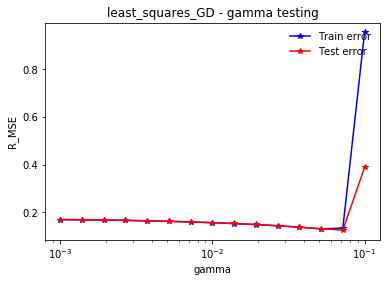

In [32]:
# seed for splitting
seed = 1234
# seed for splitting
split_ratio = ratio_for_splitting
# range of gamma to plot (from, to, iterations)
gamma_range_gd = np.logspace(-3, -1, 15)
# iterations per gamma
iteration_gd = 5
# params for LS-GD
params = {
    'gamma': 0,
    'initial_w': w_initial,
    'max_iters': iteration_gd,
}

regression_gamma_testing(Y_train, X_train, split_ratio, seed, gamma_range_gd, "least_squares_GD", params, "gamma")



## Linear regression using stochastic gradient descent

GAMMA TRAIN 1e-15
<><><><><><><><><><><><><><><><><><>
FITFITFITFITFIT
SGD(0/4): loss=0.1715629629629624, w0=7.700682819638274e-17, w1=-1.679204525667833e-16
SGD(1/4): loss=0.17156296296296175, w0=1.5395252335835394e-16, w1=-3.3785055468873576e-16
SGD(2/4): loss=0.17156296296296114, w0=2.301433239685029e-16, w1=-5.055451684980269e-16
SGD(3/4): loss=0.17156296296296059, w0=3.056629003375878e-16, w1=-6.712044555213232e-16
SGD(4/4): loss=0.17156296296295998, w0=3.8264845880389774e-16, w1=-8.404410629426865e-16
GAMMA test 1e-15
<><><><><><><><><><><><><><><><><><>
FITFITFITFITFIT
SGD(0/4): loss=0.1722666666666661, w0=7.842441255705177e-17, w1=-1.6292245088649205e-16
SGD(1/4): loss=0.17226666666666554, w0=1.5684882511410332e-16, w1=-3.258449017729835e-16
SGD(2/4): loss=0.172266666666665, w0=2.352732376711546e-16, w1=-4.887673526594745e-16
SGD(3/4): loss=0.17226666666666443, w0=3.136976502282056e-16, w1=-6.516898035459649e-16
SGD(4/4): loss=0.17226666666666388, w0=3.921220627852564e-16, w1=-

SGD(3/4): loss=0.17151862315046976, w0=5.696028324503954e-06, w1=-1.2424021313750202e-05
SGD(4/4): loss=0.17150757156767377, w0=7.108716270249227e-06, w1=-1.5542039440294995e-05
GAMMA test 1.847849797422287e-05
<><><><><><><><><><><><><><><><><><>
FITFITFITFITFIT
SGD(0/4): loss=0.17225631572643024, w0=1.4491653485650992e-06, w1=-3.0105621786614652e-06
SGD(1/4): loss=0.17224597041864378, w0=2.898190927687598e-06, w1=-6.020786491784114e-06
SGD(2/4): loss=0.17223563073845094, w0=4.347076778737181e-06, w1=-9.030673042084486e-06
SGD(3/4): loss=0.1722252966809998, w0=5.795822943064309e-06, w1=-1.2040221932234312e-05
SGD(4/4): loss=0.17221496824144308, w0=7.244429462000233e-06, w1=-1.5049433264860529e-05
8 proportion=0.9, gamma=0.000, Training RMSE=0.17151, Testing RMSE=0.17221
GAMMA TRAIN 0.0005411695265464627
<><><><><><><><><><><><><><><><><><>
FITFITFITFITFIT
SGD(0/4): loss=0.17124459416911614, w0=4.125133405575784e-05, w1=-9.072883241182248e-05
SGD(1/4): loss=0.1709242832361902, w0=8.202

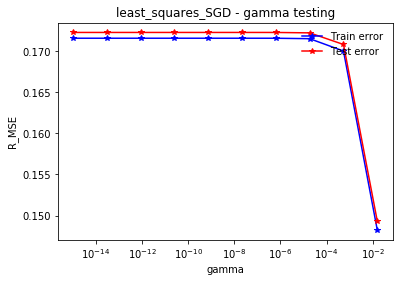

In [33]:

gamma_range_sgd = np.logspace(-15, -1.8, 10)
# iterations per gamma
iteration_sgd = 5
# params for LS-SGD
params = {
    'initial_w': w_initial,
    'batch_size': 100000,
    'max_iters': iteration_sgd,
    'gamma': 0.00005,
}

#SGD_training = implementations.Training("least_squares_SGD", params)
#SGD_training.fit(X_train, Y_train)

regression_gamma_testing(Y_train, X_train, split_ratio, seed, gamma_range_sgd, "least_squares_SGD", params, "gamma")


## Least squares regression using normal equations

## Ridge regression using normal equations

#### Fining hyperparameter lambda

GAMMA TRAIN 0.1
<><><><><><><><><><><><><><><><><><>
FITFITFITFITFIT
GAMMA test 0.1
<><><><><><><><><><><><><><><><><><>
FITFITFITFITFIT
1 proportion=0.9, gamma=0.100, Training RMSE=0.07315, Testing RMSE=0.07354
GAMMA TRAIN 0.18329807108324356
<><><><><><><><><><><><><><><><><><>
FITFITFITFITFIT
GAMMA test 0.18329807108324356
<><><><><><><><><><><><><><><><><><>
FITFITFITFITFIT
2 proportion=0.9, gamma=0.183, Training RMSE=0.07349, Testing RMSE=0.07387
GAMMA TRAIN 0.33598182862837817
<><><><><><><><><><><><><><><><><><>
FITFITFITFITFIT
GAMMA test 0.33598182862837817
<><><><><><><><><><><><><><><><><><>
FITFITFITFITFIT
3 proportion=0.9, gamma=0.336, Training RMSE=0.07379, Testing RMSE=0.07426
GAMMA TRAIN 0.6158482110660264
<><><><><><><><><><><><><><><><><><>
FITFITFITFITFIT
GAMMA test 0.6158482110660264
<><><><><><><><><><><><><><><><><><>
FITFITFITFITFIT
4 proportion=0.9, gamma=0.616, Training RMSE=0.07408, Testing RMSE=0.07467
GAMMA TRAIN 1.1288378916846888
<><><><><><><><><><><><><><

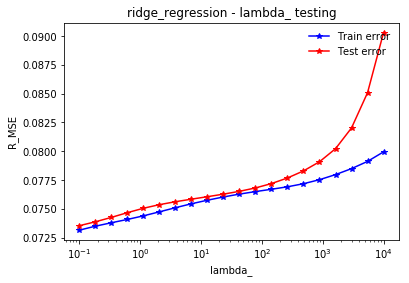

In [34]:
# seed for splitting
seed = 12

# seed for splitting
split_ratio = ratio_for_splitting

# range of lambda to plot (from, to, iterations)
lambdarange = np.logspace(-1, 4, 20)

#ridge_regression_lambda_testing(Y_train, X_train, split_ratio, seed, lambdarange)

params = {
    'lambda_': 0
}
regression_gamma_testing(Y_train, X_train, split_ratio, seed, lambdarange, "ridge_regression", params, "lambda_")


## Logistic regression using gradient descent or SGD

In [ ]:
### TODO

## Regularized logistic regression using gradient descent or SGD

In [ ]:
### TODO